# How to use bayesian optimization

In [1]:
import pandas as pd
import numpy as np
from src.experimenting.hopt_experiment import HoptExperiment
from src.pipeline_optimization.bayesian_hopt import BayesianHopt
from src.pipeline_optimization.bayesian_hopt import Config
from src.utils.thesis_utils import thesis_lookup_objective, thesis_search_space
from src.visualization.visualize import visualize_search_performance, compare_search_performance,  visualize_hopt_exp_results

In [2]:
objective = thesis_lookup_objective('WEST_diff_17520')
search_space = thesis_search_space()

In [3]:
max_evals = 8

In [4]:
bay_opt = BayesianHopt(
    identifier='Bayesian optimization',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    algo='tpe'
)

In [5]:
bay_opt.run_bayesian_hopt()

100%|██████████| 8/8 [00:00<00:00, 16.42it/s, best loss: 13.679717618156454]


results                                configs                          \
        loss status   walltime   crossval num_trees learning_rate max_depth   
0  16.800566     ok  35.327605  16.768796     380.0      0.113646      14.0   
1  13.679718     ok  52.919072  13.652763     800.0      0.113646       9.0   
2  28.689243     ok   5.065582  28.343385     100.0      0.024484      11.0   
3  16.774362     ok  34.078565  16.761504     380.0      0.005275      11.0   
4  14.791472     ok  50.878685  14.760508     520.0      0.113646      18.0   
5  14.843575     ok  44.228167  14.835847     520.0      0.068129      16.0   
6  17.036310     ok  25.796860  17.024041     380.0      0.068129       9.0   
7  13.922832     ok  57.952651  13.867183     660.0      0.189574      20.0   

                              
  min_child_weight subsample  
0             22.5      0.75  
1             22.5      0.50  
2             22.5      0.50  
3              5.0      0.75  
4             22.5      1.00  
5             22.5      0.50  
6             22.5      0.50  
7             22.5      0.50

# How to use HoptExperiment

In [11]:
max_evals = 100

In [12]:
rand = BayesianHopt(
    identifier='Random search',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    algo='random'
)
bay_opt = BayesianHopt(
    identifier='Bayesian optimization',
    search_space=search_space,
    objective=objective,
    max_evals=max_evals,
    algo='tpe'
)

In [13]:
hopt_exp = HoptExperiment(
    hopts=[bay_opt,rand],
    iterations=100
)

In [14]:
results = hopt_exp.run_hopt_experiment()

Random search duplicates: 100%|██████████| 100/100 [11:17<00:00,  6.78s/it]


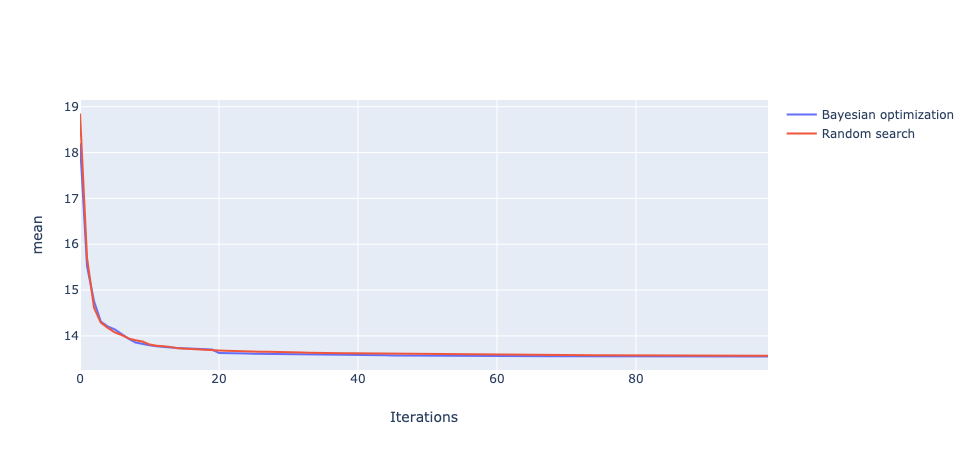

In [16]:
visualize_hopt_exp_results(results, show='mean')

In [17]:
hopt_exp._iterations = 50

In [18]:
results_50 = hopt_exp.run_hopt_experiment()

Random search duplicates: 100%|██████████| 50/50 [05:48<00:00,  6.98s/it]


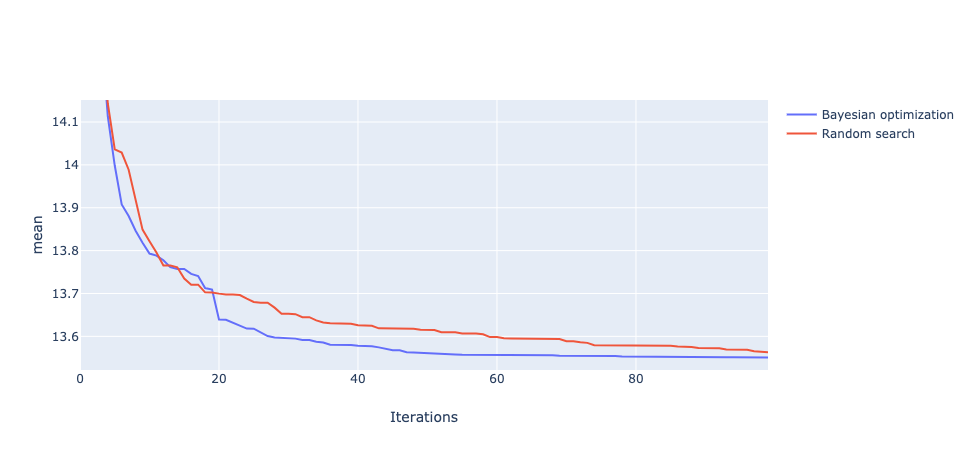

In [19]:
visualize_hopt_exp_results(results_50, show='mean')

In [20]:
hopt_exp._iterations = 25

In [21]:
results_50 = hopt_exp.run_hopt_experiment()

Random search duplicates: 100%|██████████| 25/25 [02:43<00:00,  6.55s/it]


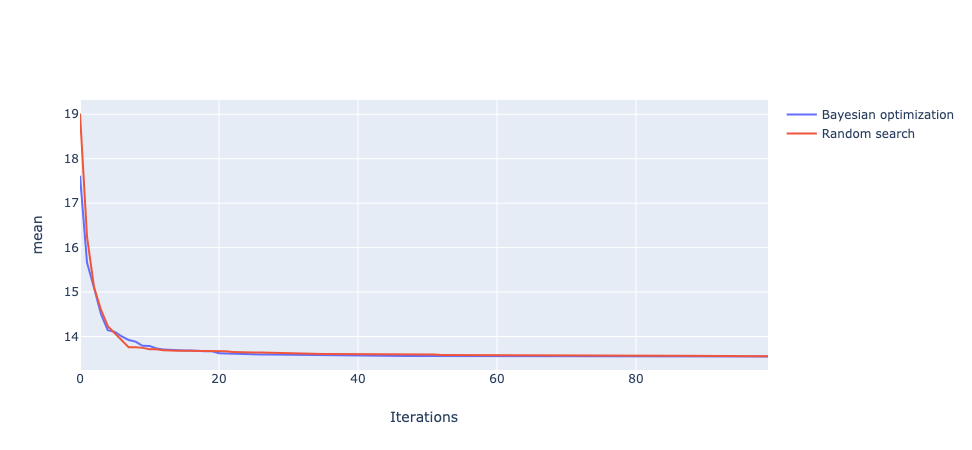

In [22]:
visualize_hopt_exp_results(results_50, show='mean')

In [23]:
hopt_exp._iterations = 10

In [24]:
results_50 = hopt_exp.run_hopt_experiment()

Random search duplicates: 100%|██████████| 10/10 [01:09<00:00,  6.91s/it]


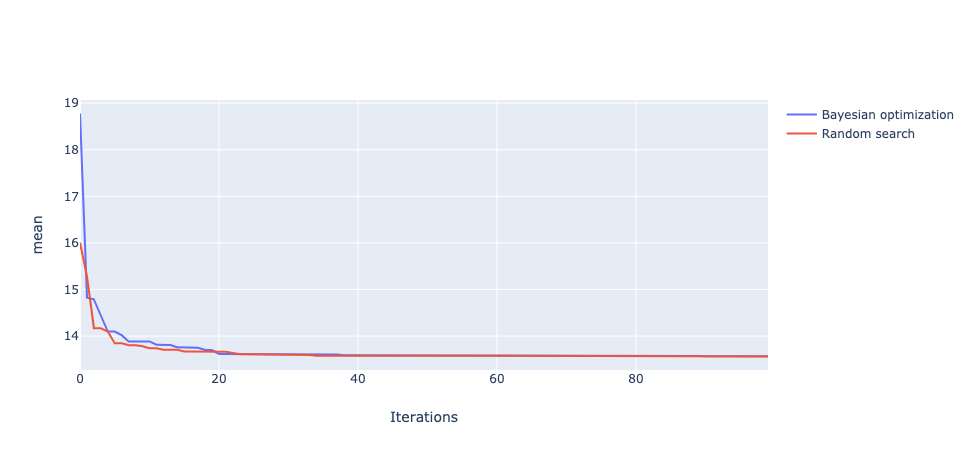

In [26]:
visualize_hopt_exp_results(results_50, show='mean')